In [230]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pandas as pd

import time

from math import *

In [245]:
dfnh = pd.read_table("data/fnh.dat", header=None, sep='\s+')
fnh=dfnh.as_matrix(columns=dfnh.columns[2:]).T[0]
dfsh = pd.read_table("data/fsh.dat", header=None, sep='\s+')
fsh=dfsh.as_matrix(columns=dfsh.columns[2:]).T[0]
t1=dfnh.as_matrix(columns=dfnh.columns[0:]).T[0]
t2=dfsh.as_matrix(columns=dfsh.columns[0:]).T[0]

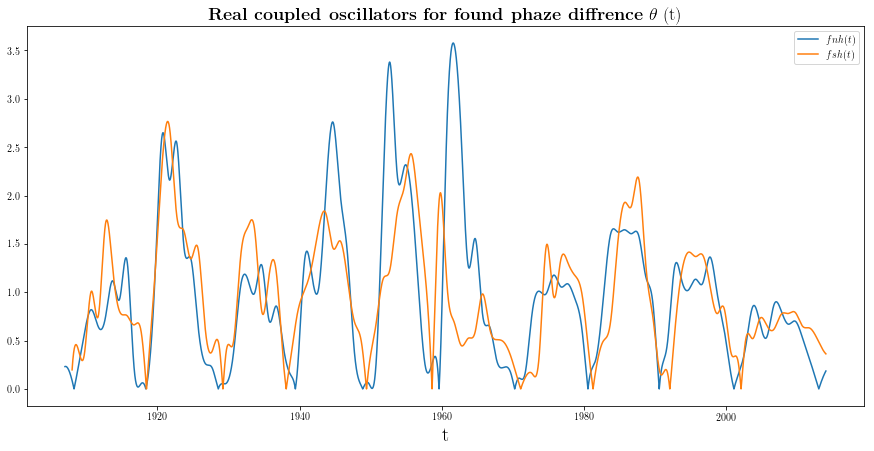

In [246]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t1, fnh, label='$fnh(t)$')
plt.plot(t2, fsh, label='$fsh(t)$')
plt.legend()
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Real coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

In [247]:
t=t2
fnh=fnh[366:]

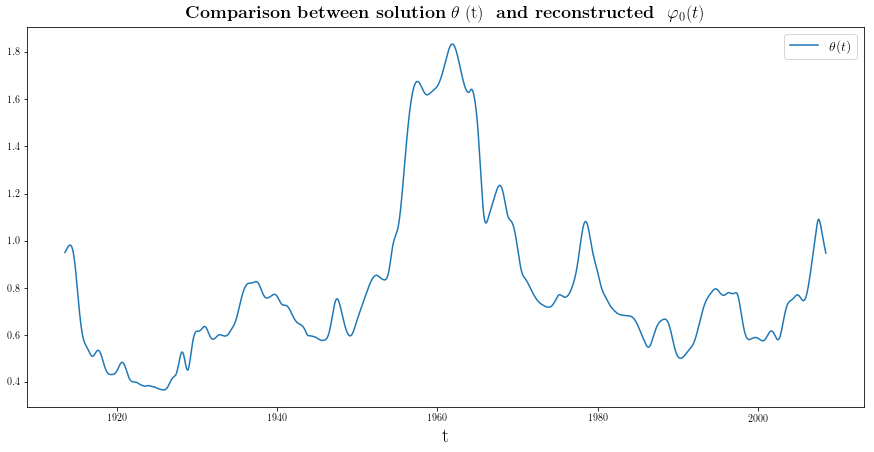

In [248]:
N_grid=t.shape[0]
p=365*11+2
h=t[1]-t[0]

dw=0.2

st=int(p/2)
fn=N_grid-1-st

C_0=[0]*N_grid

for i in range(N_grid):
    if (i-p/2>=0) and (i+p/2<=N_grid):
        C_0[i]=np.corrcoef(fnh[i-int(p/2):i+int(p/2)], fsh[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
theta=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta, '-')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

In [249]:
theta=theta[st+1:fn-1]
t=t[st+1:fn-1]

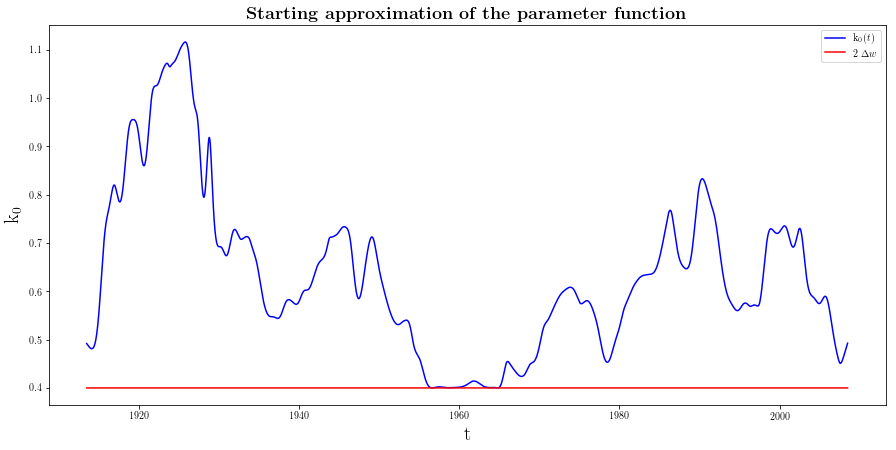

In [250]:
N_grid=t.shape[0]

dtheta=np.divide(np.diff(theta), np.diff(t))
dtheta=np.append(dtheta[0], dtheta)
k0=np.divide(2*dw, np.sin(theta))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim((min(k_0)-0.05, max(k_0)))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*(N_grid), 'r')
#plt.plot(t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
#plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

In [251]:
k0

array([ 0.49188635,  0.49182069,  0.49175491, ...,  0.49224248,
        0.49239296,  0.49254343])

In [252]:
k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")

print(k0_f(t[2]+h/2), k0_f(t[2*p]-h/2), k0_f(t[N_grid-1]+h))

0.49172194418931287 0.5856735869836982 0.492693894817786


In [253]:
f=lambda t, x: 2*dw-k0_f(t)*sin(x)
print(f(2007, 0))

0.4


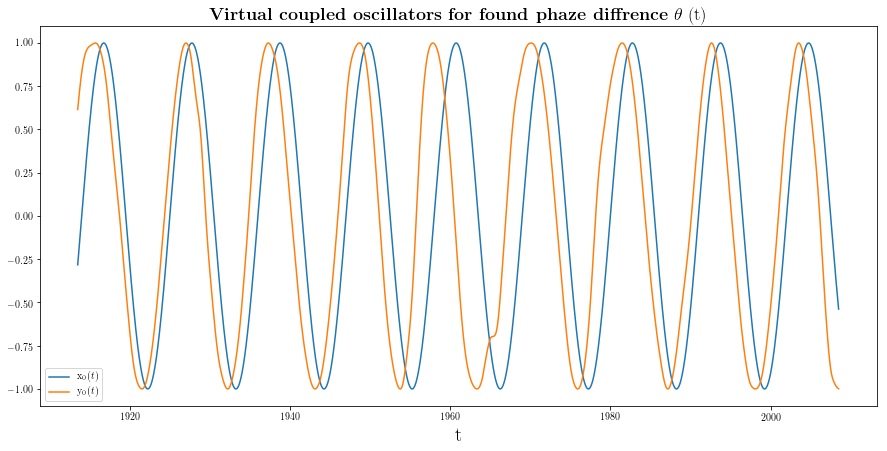

In [254]:
theta=np.array(theta)

T=11
W=2*np.pi/T

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, x0, label='$x_0(t)$')
plt.plot(t, y0, label='$y_0(t)$')
plt.legend(['x_0(t)', 'y_0(t)'])
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Virtual coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

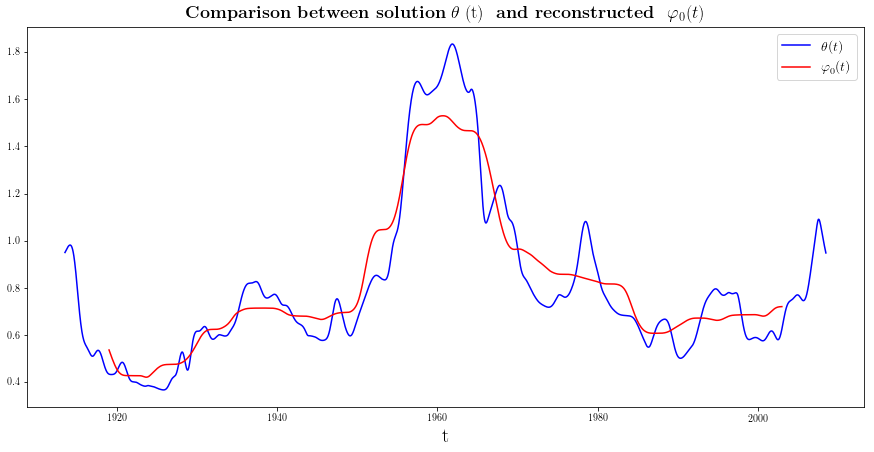

In [255]:
C_0=[0]*N_grid

for i in range(N_grid):
    if (i-p/2>=0) and (i+p/2<=N_grid):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta, 'b')
plt.plot(t, phi0, 'r')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

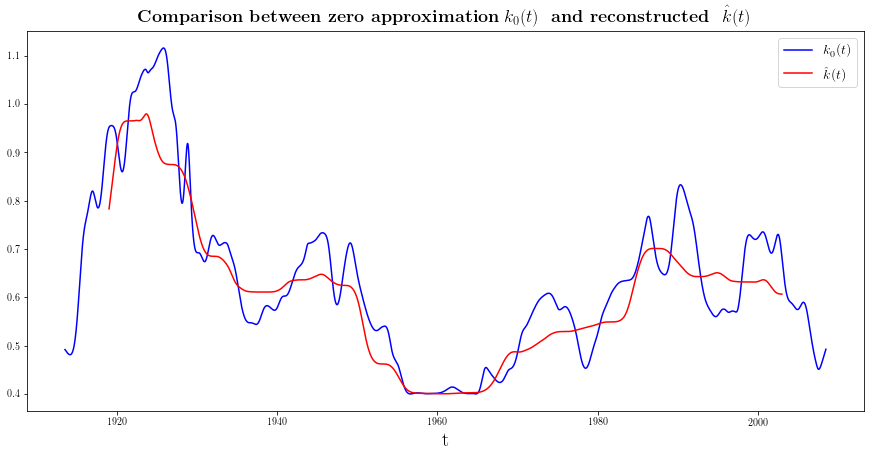

In [261]:
k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))

plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
#plt.gca().xaxis.set_ticklabels([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

In [ ]:
q_t_ar=[]

for i in range(fn-p-st):
    mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
    sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
    q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)
    
qt=max(q_t_ar)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(q_t_ar)
plt.title(r'\textbf{Metrics q2 by period}', fontsize=18)
plt.show()
qt

In [243]:
k_hat2=k_hat

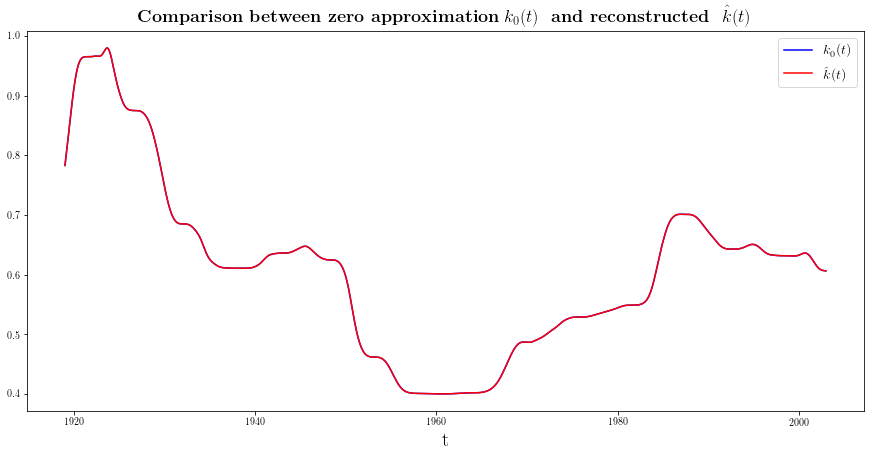

In [260]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))

plt.plot(t, 2*k_hat2, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
#plt.gca().xaxis.set_ticklabels([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()